In [255]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [256]:
df = pd.read_csv("/content/DailyDelhiClimateTest.csv")

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


In [258]:
df.date = pd.DatetimeIndex(df.date.values)
df = df.set_index('date')
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [259]:
index = pd.date_range('2021-01-01', periods=10, freq='H')
data = {'temperature': [20, np.nan, 22, 21, 23, np.nan, 24, 25, 26, 27]}
df_exemple = pd.DataFrame(data, index=index)

In [260]:
df_exemple.resample('H').ffill()

,temperature
2021-01-01 00:00:00,20.0
2021-01-01 01:00:00,NaN
2021-01-01 02:00:00,22.0
2021-01-01 03:00:00,21.0
2021-01-01 04:00:00,23.0
2021-01-01 05:00:00,NaN
2021-01-01 06:00:00,24.0
2021-01-01 07:00:00,25.0
2021-01-01 08:00:00,26.0
2021-01-01 09:00:00,27.0


In [261]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,114.000000,114.000000,114.000000,114.000000
mean,21.713079,56.258362,8.143924,1004.035090
std,6.360072,19.068083,3.588049,89.474692
min,11.000000,17.750000,1.387500,59.000000
25%,16.437198,39.625000,5.563542,1007.437500
50%,19.875000,57.750000,8.069444,1012.739316
75%,27.705357,71.902778,10.068750,1016.739583
max,34.500000,95.833333,19.314286,1022.809524


In [262]:
df_exemple = pd.read_csv("/content/DailyDelhiClimateTest.csv")
df_exemple.date = pd.to_datetime(df_exemple.date)
df_exemple = df_exemple.set_index('date')

In [263]:
df_exemple.resample('M').mean()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-31,15.710873,77.188256,7.162982,986.767947
2017-02-28,18.349981,64.375728,7.566294,1015.574251
2017-03-31,23.753760,48.009694,8.884385,1010.469641
2017-04-30,30.753663,30.408185,9.128446,1004.564831


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

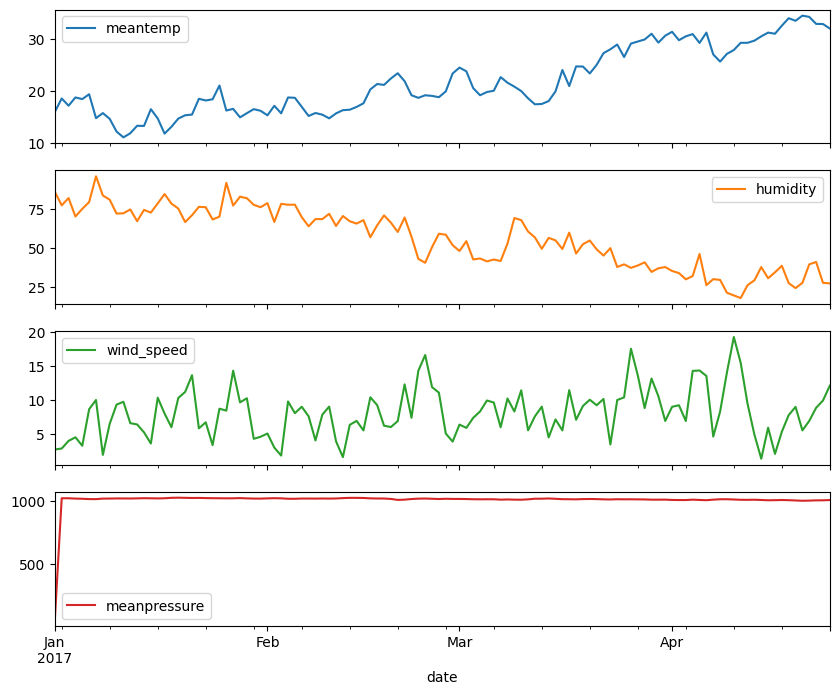

In [264]:
df.plot(subplots=True, figsize=(10,8))

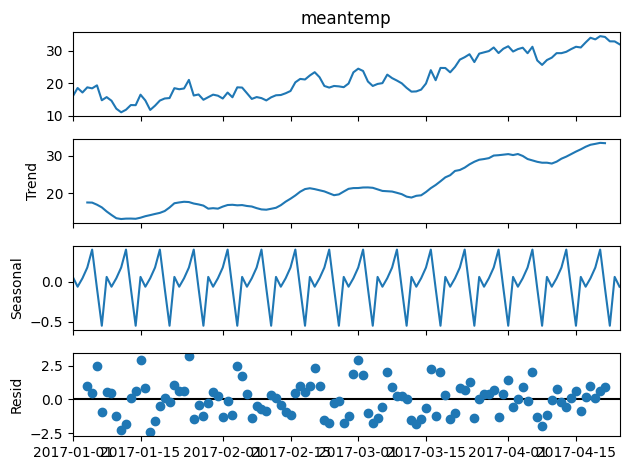

In [265]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df.meantemp)
result.plot()
plt.show()

<Axes: xlabel='date'>

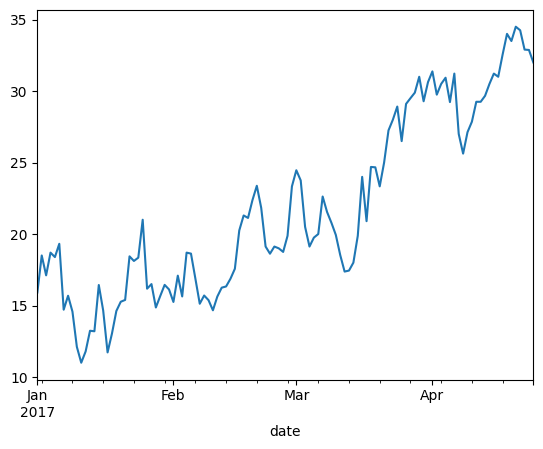

In [266]:
df.meantemp.plot()

<Axes: xlabel='date'>

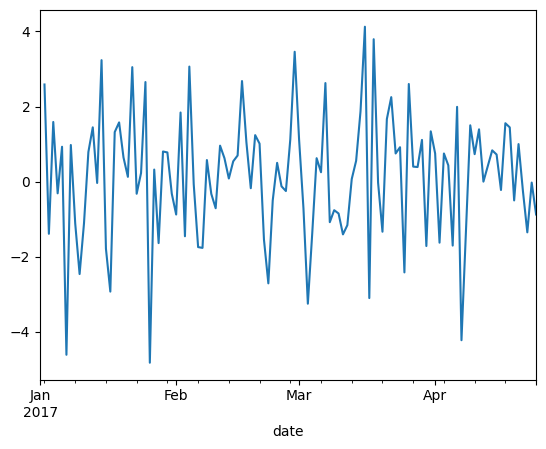

In [267]:
df.meantemp.diff().plot()

# **DIFERENCIAÇÃO**

In [268]:
df['meantempDiff'] = df['meantemp'].diff()

Este código calcula a diferença entre os valores consecutivos da temperatura média e armazena o resultado na coluna meanTempDiff.

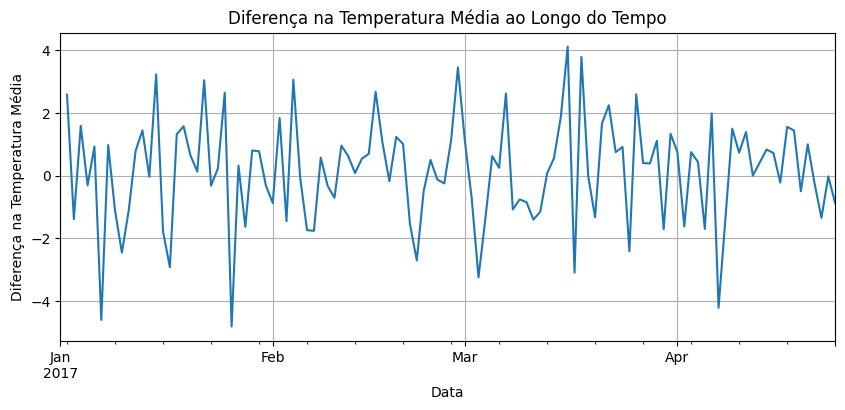

In [269]:
plt.figure(figsize=(10, 4))
df['meantempDiff'].plot()
plt.ylabel('Diferença na Temperatura Média')
plt.title('Diferença na Temperatura Média ao Longo do Tempo')
plt.xlabel('Data')
plt.grid()
plt.show()

In [270]:
from statsmodels.tsa.stattools import adfuller, kpss
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value}')

def kpss_test(series):
    result = kpss(series, regression="c", nlags="auto")
    print(f'KPSS Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[3].items():
        print(f'Critical Value ({key}): {value}')

In [271]:
adf_test(df['meantemp'].dropna())
kpss_test(df['meantemp'].dropna())

ADF Statistic: -1.096474275875619
p-value: 0.7164758731775932
Critical Value (1%): -3.489589552580676
Critical Value (5%): -2.887477210140433
Critical Value (10%): -2.580604145195395
KPSS Statistic: 1.5124915847128408
p-value: 0.01
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739


<ipython-input-270-dc03ecb0fca7>:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression="c", nlags="auto")


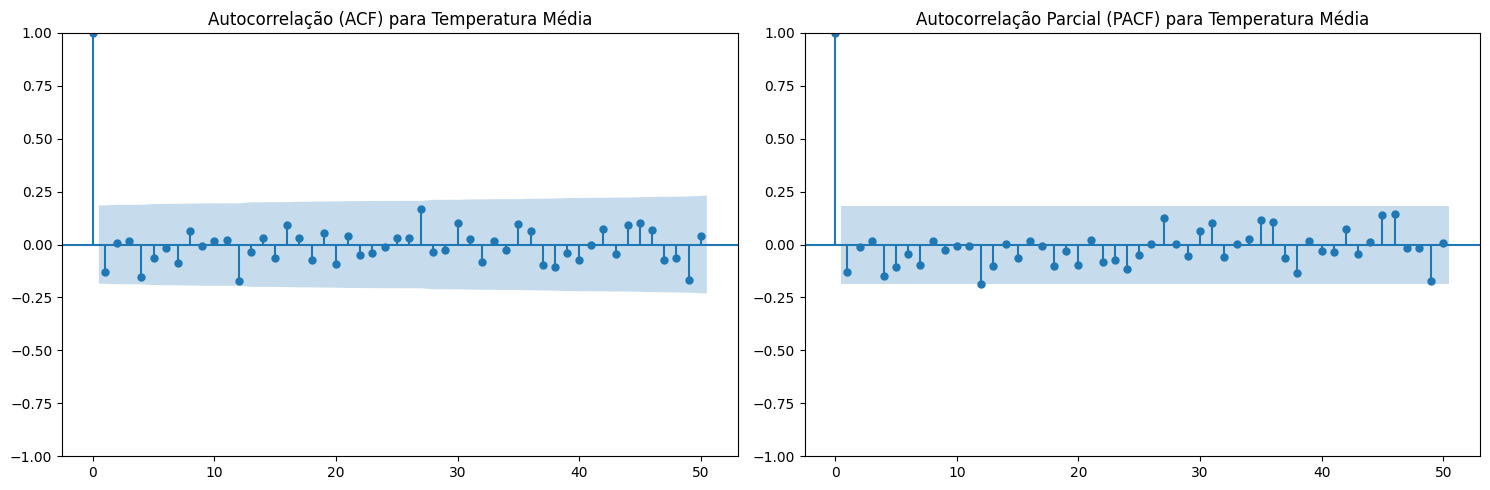

In [272]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Criar uma figura com dois subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plotar o gráfico de autocorrelação (ACF) no primeiro subplot
plot_acf(df['meantempDiff'][1:], lags=50, ax=ax1)
ax1.set_title('Autocorrelação (ACF) para Temperatura Média')

# Plotar o gráfico de autocorrelação parcial (PACF) no segundo subplot
plot_pacf(df['meantempDiff'][1:], lags=50, ax=ax2)
ax2.set_title('Autocorrelação Parcial (PACF) para Temperatura Média')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()


# DADO TRAIN E TEST



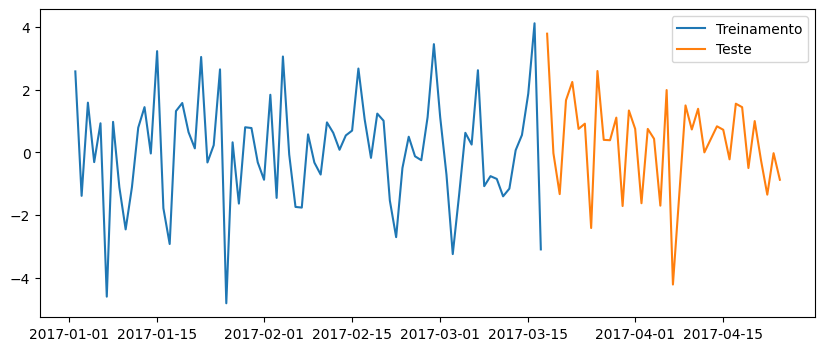

In [273]:
# Definindo o tamanho do conjunto de treinamento como 2/3 do total de dados
train_size = int(len(df.meantempDiff) * 2 / 3)

# Dividindo os dados em conjunto de treinamento e teste
train_set = df.meantempDiff[:train_size]
test_set = df.meantempDiff[train_size:]

# Plotando os conjuntos de treinamento e teste
plt.figure(figsize=(10, 4))
plt.plot(train_set, label="Treinamento")
plt.plot(test_set, label="Teste")
plt.legend()
plt.show()

# MODELO AUTOREGRESSIVO (AR) - LinearRegression

In [274]:
from sklearn.linear_model import LinearRegression
import pandas as pd

dfmodel = pd.DataFrame({'TrainMeanTemp': train_set, 'Precisaosimples': train_set.shift(1)}).dropna()

X = dfmodel[['Precisaosimples']]
y = dfmodel[['TrainMeanTemp']]

# Ajustando o modelo de regressão linear
reg = LinearRegression().fit(X, y)

# Fazendo previsões com o modelo ajustado
prediction = reg.predict(X)


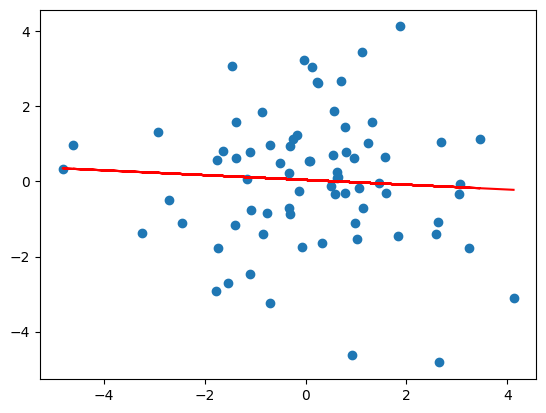

In [275]:
plt.scatter(X, y)
plt.plot(X, prediction, color='red')

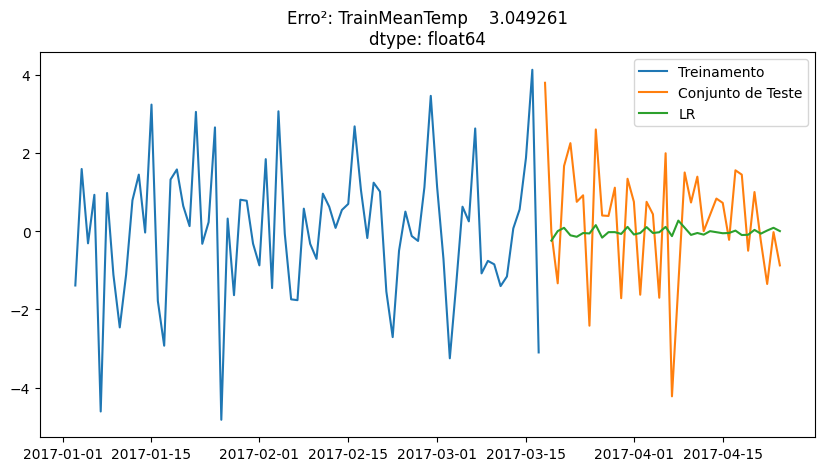

In [276]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'train_set' é a sua série temporal de temperatura média
# e 'df' é o seu DataFrame que contém 'meantempDiff'

# Criando um DataFrame para o modelo, incluindo a temperatura média e a temperatura média deslocada
dfmodel = pd.DataFrame({'TrainMeanTemp': train_set, 'Precisaosimples': train_set.shift(1)}).dropna()

# Definindo X como a temperatura média deslocada e y como a temperatura média
X = dfmodel[['Precisaosimples']]
y = dfmodel[['TrainMeanTemp']]

# Ajustando o modelo de regressão linear
reg = LinearRegression().fit(X, y)

# Fazendo previsões com o modelo ajustado
prediction = reg.predict(X)

# Calculando o coeficiente do modelo
coef = reg.coef_[0][0]

# Calculando as previsões para o conjunto de teste usando o coeficiente
pred_AR1 = coef * test_set.shift(1)

# Calculando o erro quadrático médio
erro = ((y - prediction)**2).mean()

# Plotando os dados de treinamento, teste e as previsões
plt.figure(figsize=(10, 5))
plt.plot(dfmodel['TrainMeanTemp'], label="Treinamento")
plt.plot(test_set, label='Conjunto de Teste')
plt.plot(pred_AR1, label="LR")
plt.title(f"Erro²: {erro}")
plt.legend()

plt.show()


# AUTOREGRESSÃO

In [277]:
train_size = int(len(df.meantemp)*2/3)
train_set = df.meantemp[:train_size]
test_set = df.meantemp[train_size:]
test_diff = test_set.diff(1)
dfmodel =  pd.DataFrame({'TrainMeanTemp': train_set, 'TrainDiff':train_set.diff(1)}).dropna()

In [278]:
from statsmodels.tsa.ar_model import AutoReg


dfmodel.index = pd.date_range(start=dfmodel['TrainDiff'].index[0], periods=len(dfmodel['TrainDiff']), freq='D')
ar1 = AutoReg(dfmodel['TrainDiff'], lags=1).fit()
dfmodel.index = pd.date_range(start=dfmodel['TrainDiff'].index[0], periods=len(dfmodel['TrainDiff']), freq='D')
ar2 = AutoReg(dfmodel['TrainDiff'], lags=2).fit()
prediction1 = ar1.predict()
prediction2 = ar2.predict()
ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              TrainDiff   No. Observations:                   75
Model:                     AutoReg(2)   Log Likelihood                -144.473
Method:               Conditional MLE   S.D. of innovations              1.751
Date:                Mon, 15 Apr 2024   AIC                            296.946
Time:                        00:00:48   BIC                            306.108
Sample:                    01-04-2017   HQIC                           300.597
                         - 03-17-2017                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0572      0.205      0.279      0.780      -0.345       0.459
TrainDiff.L1    -0.0494      0.119     -0.415      0.678      -0.283       0.184
TrainDiff.L2    -0.0298      0.122     -0.244      0.807      -0.269       0.209
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8300           -5.7355j            5.7952           -0.2729
AR.2           -0.8300           +5.7355j            5.7952            0.2729
-----------------------------------------------------------------------------
"""

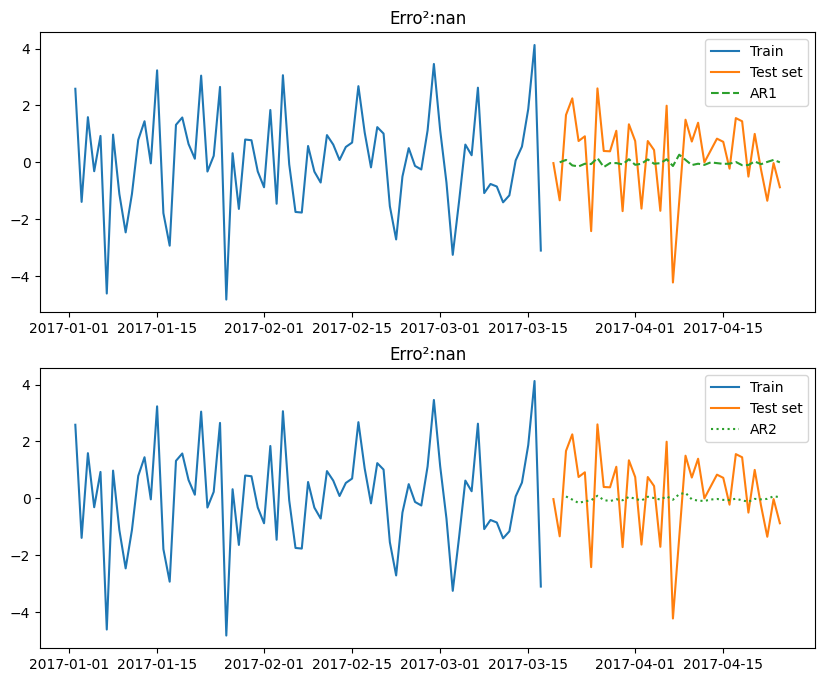

In [279]:
pred_AR1 = 0
for i, coef in enumerate(ar1.params[1:]):
    pred_AR1 += coef * test_diff.shift(i+1)

pred_AR2 = 0
for i, coef in enumerate(ar2.params[1:]):
    pred_AR2 += coef * test_diff.shift(i+1)

erro1 = round(((dfmodel.TrainDiff - pred_AR1)**2).mean(), 2)
erro2 = round(((dfmodel.TrainDiff - pred_AR2)**2).mean(), 2)

plt.figure(figsize=(10, 8))

# Primeiro subplot
plt.subplot(2, 1, 1)
plt.plot(dfmodel.TrainDiff, label="Train")
plt.plot(test_diff, label='Test set')
plt.plot(pred_AR1, label="AR1", linestyle='--') # Usando linestyle para diferenciar
plt.title(f"Erro²:{erro1}")
plt.legend()

# Segundo subplot
plt.subplot(2, 1, 2)
plt.plot(dfmodel.TrainDiff, label="Train")
plt.plot(test_diff, label='Test set')
plt.plot(pred_AR2, label="AR2", linestyle=':') # Usando linestyle para diferenciar
plt.title(f"Erro²:{erro2}")
plt.legend()

plt.show()


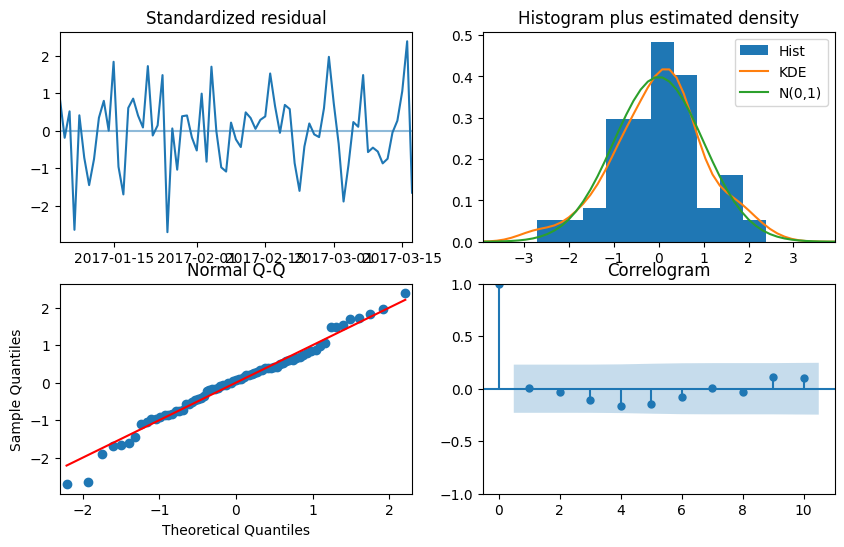

In [280]:
ar2.plot_diagnostics(figsize=(10,6));

# ARIMA

Método estatístico que utiliza autoregressão e médias móveis para previsão de séries temporais.






In [281]:
from statsmodels.tsa.arima.model import ARIMA

# Supondo que 'df.meantemp' seja sua série temporal
arima = ARIMA(df.meantemp, freq='D', order=(5,1,2)).fit()
pred_arima = arima.predict(start='2017-03-19')
model = ARIMA(df.meantemp, freq= 'D', order=(5, 1, 2))

# Ajuste o modelo aos dados
model_fit = model.fit()

# Calculando a média dos quadrados dos resíduos
mean_squared_residuals = (arima.resid ** 2).mean()
print(mean_squared_residuals)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


4.920214254780361


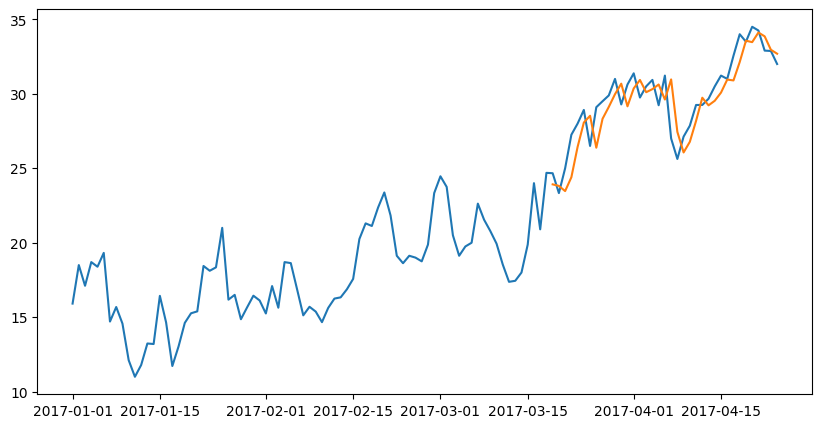

In [282]:
plt.figure(figsize=(10, 5))
plt.plot(df.meantemp)
plt.plot(arima.predict(start='2017-03-19', typ='levels'))

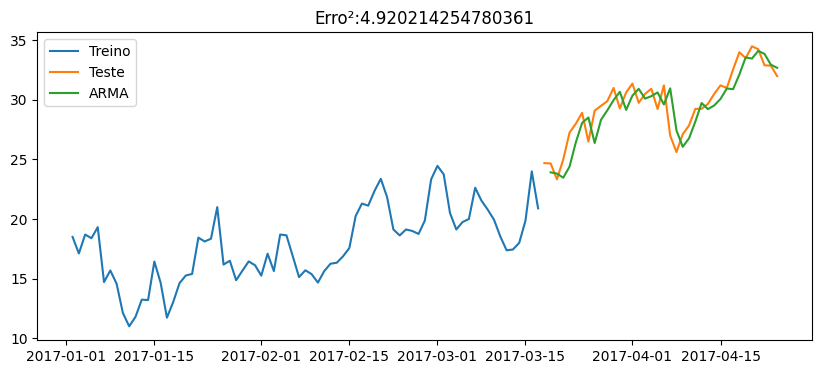

In [283]:
best_mse = (arima.resid ** 2).mean()
plt.figure(figsize=(10, 4))
plt.plot(dfmodel['TrainMeanTemp'], label='Treino')
plt.plot(test_set, label='Teste')
plt.plot(pred_arima, label="ARMA")
plt.title(f"Erro²:{best_mse}")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


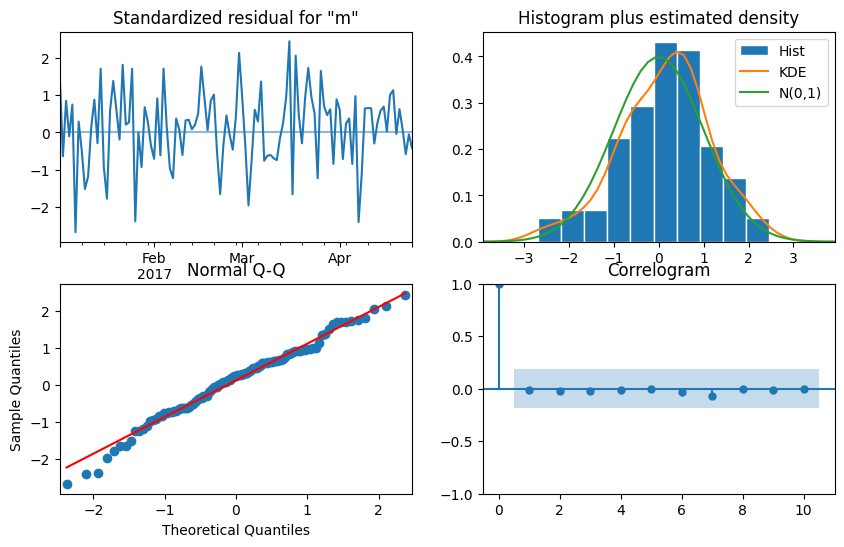

In [284]:
model_arima = ARIMA(df.meantemp, freq='D', order=(5,1,2))
model_arima_fit = model_arima.fit()
model_fit.plot_diagnostics(figsize=(10,6));
plt.show()

# AUTOARIMA

In [285]:
%pip install pmdarima

In [286]:
from pmdarima import auto_arima
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Suponha que você tenha um DataFrame df com a série temporal que deseja modelar
# e a série esteja na coluna 'serie_temporal'

# Ajustar o modelo AutoARIMA
modelo_autoarima = auto_arima(train_set, seasonal=True, m=12, D=0)

# Resumo do modelo
print(modelo_autoarima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   76
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -148.981
Date:                Mon, 15 Apr 2024   AIC                            299.961
Time:                        00:01:03   BIC                            302.279
Sample:                    01-01-2017   HQIC                           300.887
                         - 03-17-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         3.1110      0.474      6.560      0.000       2.181       4.040
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 1.25
Prob(Q):                              0.59   Pr

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likeli

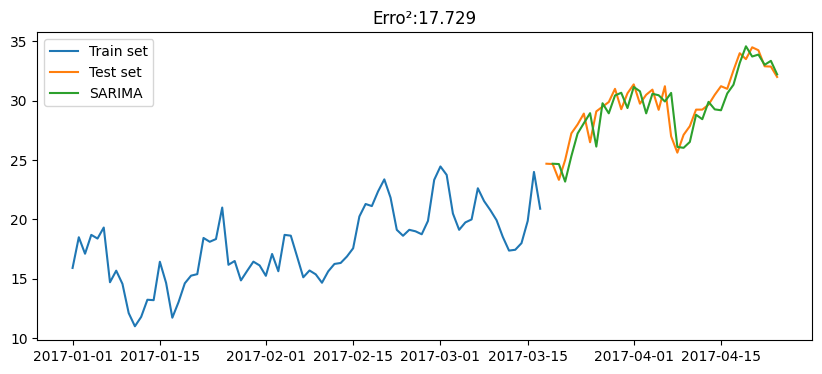

In [287]:
model_sarima = SARIMAX(df.meantemp, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) # Ajuste os parâmetros conforme necessário
model_sarima_fit = model_sarima.fit()

sarima_train = SARIMAX(train_set, order = (1, 1, 1), seasonal_order = (2,0,2,12)).fit()
sarima_auto = SARIMAX(test_set, order = (1, 1, 1), seasonal_order = (2,0,2,12)).fit(sarima_train.params)
erro = round((sarima_auto.resid**2).mean(),3)
plt.figure(figsize=(10, 4))
plt.plot(train_set, label='Train set')
plt.plot(test_set, label='Test set')
plt.plot(sarima_auto.predict(start='2017-03-19',typ='levels'), label="SARIMA")
plt.title(f"Erro²:{erro}")
plt.legend()

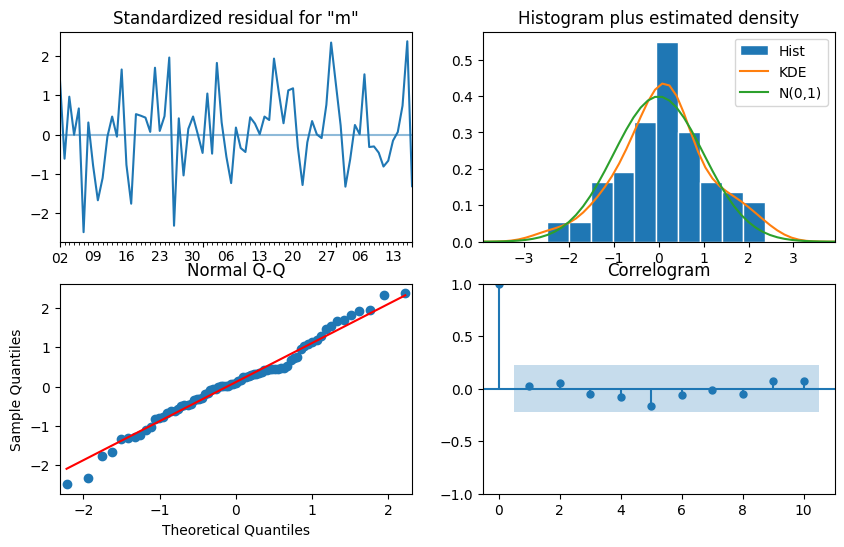

In [288]:

sarima.plot_diagnostics(figsize=(10,6));